Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/training_final.csv')

In [ ]:
df.head()

,Unnamed: 0,Document,Summary,Kannada_summary
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,"ಸಿರಿಯನ್ ಅಧಿಕಾರಿ: ಒಬಾಮಾ ಮರದ ಮೇಲಕ್ಕೆ ಏರಿದರು, ""ಹೇ..."
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,ಉಸೇನ್ ಬೋಲ್ಟ್ ವಿಶ್ವ ಚಾಂಪಿಯನ್‌ಶಿಪ್‌ನ ಮೂರನೇ ಚಿನ್ನ...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,ಏಜೆನ್ಸಿಯ ಕಾನ್ಸಾಸ್ ಸಿಟಿ ಕಚೇರಿಯಲ್ಲಿ ಉದ್ಯೋಗಿ ನೂರಾ...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,ಹೊಸ: ಕೆನಡಾದ ವೈದ್ಯರೊಬ್ಬರು 2010 ರಲ್ಲಿ ಹ್ಯಾರಿ ಬುರ...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,ಕ್ಯಾಲಿಫೋರ್ನಿಯಾ ಶಾಲೆಯ ಹೊರಗೆ ಸಾಮೂಹಿಕ ಅತ್ಯಾಚಾರದಲ್...


In [ ]:
import numpy as np  
import pandas as pd 
import re           
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data=pd.read_csv("/content/drive/My Drive/training_final_1.csv")
data1=pd.read_csv("/content/drive/My Drive/test_final.csv")
data2=pd.read_csv("/content/drive/My Drive/validation_final.csv")

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
#training
print(data['Document'][:5])
print(data['Summary'][:5])
print(data['Kannada_summary'][:5])


0    It's official: U.S. President Barack Obama wan...
1    (CNN) -- Usain Bolt rounded off the world cham...
2    Kansas City, Missouri (CNN) -- The General Ser...
3    Los Angeles (CNN) -- A medical doctor in Vanco...
4    (CNN) -- Police arrested another teen Thursday...
Name: Document, dtype: object
0    Syrian official: Obama climbed to the top of t...
1    Usain Bolt wins third gold of world championsh...
2    The employee in agency's Kansas City office is...
3    NEW: A Canadian doctor says she was part of a ...
4    Another arrest made in gang rape outside Calif...
Name: Summary, dtype: object
0    ಸಿರಿಯನ್ ಅಧಿಕಾರಿ: ಒಬಾಮಾ ಮರದ ಮೇಲಕ್ಕೆ ಏರಿದರು, "ಹೇ...
1    ಉಸೇನ್ ಬೋಲ್ಟ್ ವಿಶ್ವ ಚಾಂಪಿಯನ್‌ಶಿಪ್‌ನ ಮೂರನೇ ಚಿನ್ನ...
2    ಏಜೆನ್ಸಿಯ ಕಾನ್ಸಾಸ್ ಸಿಟಿ ಕಚೇರಿಯಲ್ಲಿ ಉದ್ಯೋಗಿ ನೂರಾ...
3    ಹೊಸ: ಕೆನಡಾದ ವೈದ್ಯರೊಬ್ಬರು 2010 ರಲ್ಲಿ ಹ್ಯಾರಿ ಬುರ...
4    ಕ್ಯಾಲಿಫೋರ್ನಿಯಾ ಶಾಲೆಯ ಹೊರಗೆ ಸಾಮೂಹಿಕ ಅತ್ಯಾಚಾರದಲ್...
Name: Kannada_summary, dtype: object


In [ ]:
data.dropna(axis=0,inplace=True)
data.dropna(axis=0,inplace=True)
data1.dropna(axis=0,inplace=True)
data1.dropna(axis=0,inplace=True)
data2.dropna(axis=0,inplace=True)
data2.dropna(axis=0,inplace=True)

In [ ]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    new_text = text.lower() #lower case
    new_text = re.sub(r'\([^)]*\)', '', new_text) #text in bracket
    new_text = re.sub('"','', new_text) 
    new_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_text.split(" ")])    #contraction mapping
    new_text = re.sub(r"'s\b","",new_text) #removal 's
    new_text = re.sub(r"([-:;!?])", r" \1", new_text)
    new_text = re.sub(r"[-:;!?]+", r" ", new_text) #removal of punctuation
    tokens = [w for w in new_text.split() if not w in stop_words] #removal of stop words
    long_words=[]
    for i in tokens:
        long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text_train = []
cleaned_text_test = []
cleaned_text_validation = []
for i in data['Document']:
    cleaned_text_train.append(text_cleaner(i))
for i in data1['Document']:
    cleaned_text_test.append(text_cleaner(i))
for i in data2['Document']:
    cleaned_text_validation.append(text_cleaner(i))

In [ ]:
def summary_cleaner(text):
    new_text = re.sub('"','', text)
    new_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_text.split(" ")])    
    new_text = re.sub(r"'s\b","",new_text)
    new_text = re.sub(r"([-:;!?])", r" \1", new_text)
    new_text = re.sub(r"[-:;!??]+", r" ", new_text)
    new_text = new_text.lower()
    tokens=new_text.split()
    new_text=''
    for i in tokens:
        new_text=new_text+i+' '  
    return new_text
cleaned_summary_train = []
cleaned_summary_test= []
cleaned_summary_validation = []
for i in data['Summary']:
    cleaned_summary_train.append(summary_cleaner(i))
for i in data1['Summary']:
    cleaned_summary_test.append(summary_cleaner(i))
for i in data2['Summary']:
    cleaned_summary_validation.append(summary_cleaner(i))

data['cleaned_document']=cleaned_text_train
data['cleaned_summary']=cleaned_summary_train
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

data1['cleaned_document']=cleaned_text_test
data1['cleaned_summary']=cleaned_summary_test
data1['cleaned_summary'].replace('', np.nan, inplace=True)
data1.dropna(axis=0,inplace=True)

data2['cleaned_document']=cleaned_text_validation
data2['cleaned_summary']=cleaned_summary_validation
data2['cleaned_summary'].replace('', np.nan, inplace=True)
data2.dropna(axis=0,inplace=True)

In [ ]:
def kan_summary_cleaner(text):
    new_text = re.sub('"','', text) 
    new_text = re.sub(r"([-:;!?])", r" \1", new_text)
    new_text = re.sub(r"[-:;!??]+", r" ", new_text)
    tokens=new_text.split()
    new_text=''
    for i in tokens:
        new_text=new_text+i+' '  
    return new_text
cleaned_kan_summary_train = []
cleaned_kan_summary_test= []
cleaned_kan_summary_validation = []
for i in data['Kannada_summary']:
    cleaned_kan_summary_train.append(kan_summary_cleaner(i))
for i in data1['Kannada_summary']:
    cleaned_kan_summary_test.append(kan_summary_cleaner(i))
for i in data2['Kannada_summary']:
    cleaned_kan_summary_validation.append(kan_summary_cleaner(i))

data['cleaned_document']=cleaned_text_train
data['cleaned_summary']=cleaned_summary_train
data['cleaned_summary'].replace('', np.nan, inplace=True)
data['cleaned_kan_summary']=cleaned_kan_summary_train
data['cleaned_kan_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

data1['cleaned_document']=cleaned_text_test
data1['cleaned_summary']=cleaned_summary_test
data1['cleaned_summary'].replace('', np.nan, inplace=True)
data1['cleaned_kan_summary']=cleaned_kan_summary_test
data1['cleaned_kan_summary'].replace('', np.nan, inplace=True)
data1.dropna(axis=0,inplace=True)

data2['cleaned_document']=cleaned_text_validation
data2['cleaned_summary']=cleaned_summary_validation
data2['cleaned_summary'].replace('', np.nan, inplace=True)
data2['cleaned_kan_summary']=cleaned_kan_summary_validation
data2['cleaned_kan_summary'].replace('', np.nan, inplace=True)
data2.dropna(axis=0,inplace=True)

In [ ]:
for i in range(5):
    print("Doc:",data['cleaned_document'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("Kannada_Summary:",data['cleaned_kan_summary'][i])
    print("\n")

Doc: official u.s. president barack obama wants lawmakers weigh whether use military force syria. obama sent letter heads house senate saturday night, hours announcing believes military action syrian targets right step take alleged use chemical weapons. proposed legislation obama asks congress approve use military force deter, disrupt, prevent degrade potential future uses chemical weapons weapons mass destruction. step set turn international crisis fierce domestic political battle. key questions looming debate u.n. weapons inspectors find syria happens congress votes syrian government react televised address white house rose garden earlier saturday, president said would take case congress, wants to. believe authority carry military action without specific congressional authorization, know country stronger take course, actions even effective, said. debate, issues big business usual. obama said top congressional leaders agreed schedule debate body returns washington september 9. senate 

In [ ]:
clean_texts=data['cleaned_document']
clean_summaries=data['cleaned_summary']

In [ ]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i])
    print()


Clean Review # 1
syrian official obama climbed to the top of the tree, does not know how to get down. obama sends a letter to the heads of the house and senate. obama to seek congressional approval on military action against syria. aim is to determine whether cw were used, not by whom, says u.n. spokesman. 
official u.s. president barack obama wants lawmakers weigh whether use military force syria. obama sent letter heads house senate saturday night, hours announcing believes military action syrian targets right step take alleged use chemical weapons. proposed legislation obama asks congress approve use military force deter, disrupt, prevent degrade potential future uses chemical weapons weapons mass destruction. step set turn international crisis fierce domestic political battle. key questions looming debate u.n. weapons inspectors find syria happens congress votes syrian government react televised address white house rose garden earlier saturday, president said would take case congre

In [ ]:

document = clean_texts
summary =clean_summaries

Model

In [ ]:
import re
import os
import time
import numpy as np
import pandas as pd 
import unicodedata
import tensorflow as tf
import tensorflow.keras as krs
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
import csv

BUFFER_SIZE = 20000
BATCH_SIZE = 64
embedding_dim = 50 # first it was 200

In [ ]:
summaries = clean_summaries
longreview = clean_texts

In [ ]:
longreview.head()

0    official u.s. president barack obama wants law...
1    usain bolt rounded world championships sunday ...
2    kansas city, missouri general services adminis...
3    los angeles medical doctor vancouver, british ...
4    police arrested another teen thursday, sixth s...
Name: cleaned_document, dtype: object

Adding <start> and <end> tags to the summary(sentence tokenization)

In [ ]:
start_token, end_token = '<startseq>' , '<endseq>'
summaries = summaries.apply(lambda x: start_token + ' ' + x + ' ' + end_token)
summaries.head()

0    <startseq> syrian official obama climbed to th...
1    <startseq> usain bolt wins third gold of world...
2    <startseq> the employee in agency kansas city ...
3    <startseq> new a canadian doctor says she was ...
4    <startseq> another arrest made in gang rape ou...
Name: cleaned_summary, dtype: object

In [ ]:
# train validation split
val_split = 0.1
summaries_train = summaries[int(len(summaries)*val_split):]
summaries_val = summaries[:int(len(summaries)*val_split)]
longreview_train = longreview[int(len(summaries)*val_split):]
longreview_val = longreview[:int(len(summaries)*val_split)]

len(longreview_val),len(longreview_train)

(9011, 81108)

In [ ]:
longreview_train.iloc[0], summaries_train.iloc[0]

("world agree 2013 year girl right education finally even remote lawless corners globe last october, shocked attempted murder 15 year old pakistani girl malala yousufzai, three million people around world rushed sign petition demanding universal girls' education. pakistani government agreed first time legislate compulsory free education provided stipends three million children. week shahnaz nazli, brave 41 year old teacher way child work girls' school, shot dead joined ever lengthening list teachers students murdered support basic right girls go school. murder demonstrates yet parts indian subcontinent, afghanistan, africa, intimidation violence daily reality life many girls want go school many educators want teach them. even today, five months malala shooting swat valley, school friends remain fear violence simply attempting return school. new petition, launched week www.educationenvoy.org first signatories, malala yousafzai father ziauddin calls immediate tightening security protecti

In [ ]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(d.split()) for d in longs)
    length_shorts = list(len(d.split()) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(summaries_train.to_list(), longreview_train.to_list(), 90)


print('max-length longreview chosen for training: ', max_len_news)
print('max-length summaries chosen for training: ', max_len_summary)

percentile 90 of length of news: 649.0
longest sentence:  1274

percentile 90 of length of summaries: 57.0
longest sentence:  108

max-length longreview chosen for training:  649
max-length summaries chosen for training:  57


In [ ]:
# making a vocabulary of the words 
def create_vocab(shorts, longs = None, minimum_repeat = 3):

    # Create a list of all the captions
    all_captions = []
    for s in shorts:
        all_captions.append(s)

    # Consider only words which occur at least minimum_occurrence times in the corpus
    word_counts = {}
    nsents = 0
    for sent in all_captions:
        nsents += 1
        for w in sent.split(' '):
            word_counts[w] = word_counts.get(w, 0) + 1

    vocab = [w for w in word_counts if word_counts[w] >= minimum_repeat]
    
    vocab = list(set(vocab))
    return vocab

In [ ]:
# each word in the vocabulary must be used in the data atleast minimum_repeat times
vocab_dec = create_vocab(summaries_train.to_list(), minimum_repeat=5) # here we just use the words in vocabulary of summaries
# removing one character words from vocab except for 'a'
for v in vocab_dec:
    if len(v) == 1 and v!='a' and v!='i':
        vocab_dec.remove(v) 
        
vocab_dec = sorted(vocab_dec)[1:] # [1:] is for the '' 
vocab_dec[:10]

['#bringbackourgirls',
 '$1',
 '$1,000',
 '$1,200',
 '$1,500',
 '$1.1',
 '$1.2',
 '$1.25',
 '$1.3',
 '$1.4']

Tokenization

In [ ]:
oov_token = '<UNK>'
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n' # making sure all the last non digit non alphabet chars are removed
document_tokenizer = krs.preprocessing.text.Tokenizer(filters = filters,oov_token=oov_token)
summary_tokenizer = krs.preprocessing.text.Tokenizer(filters = filters,oov_token=oov_token)
document_tokenizer.fit_on_texts(vocab_enc)
summary_tokenizer.fit_on_texts(vocab_dec)

# caculating number of words in vocabulary of encoder and decoder
# they are important for positional encoding
encoder_vocab_size = len(document_tokenizer.word_index) + 1 
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

# vocab_size
encoder_vocab_size, decoder_vocab_size

(109587, 24239)

create index to word dictionary

In [ ]:
ixtoword_enc = {} # index to word dic
ixtoword_dec = {} # index to word dic

wordtoix_enc = document_tokenizer.word_index # word to index dic
ixtoword_enc[0] = '<PAD0>' # no word in vocab has index 0. but padding is indicated with 0
ixtoword_dec[0] = '<PAD0>' # no word in vocab has index 0. but padding is indicated with 0

for w in document_tokenizer.word_index:
    ixtoword_enc[document_tokenizer.word_index[w]] = w
################################################
wordtoix_dec = summary_tokenizer.word_index # word to index dic

for w in summary_tokenizer.word_index:
    ixtoword_dec[summary_tokenizer.word_index[w]] = w

In [ ]:
# assign a number to each word inorder to find it in word embeddings
inputs = document_tokenizer.texts_to_sequences(longreview_train)
targets = summary_tokenizer.texts_to_sequences(summaries_train)
inputs_val = document_tokenizer.texts_to_sequences(longreview_val)
targets_val = summary_tokenizer.texts_to_sequences(summaries_val)

Padding upto the maxlen

In [ ]:
inputs = krs.preprocessing.sequence.pad_sequences(inputs, maxlen=max_len_news, padding='post', truncating='post')
targets = krs.preprocessing.sequence.pad_sequences(targets, maxlen=max_len_summary, padding='post', truncating='post')
inputs_val = krs.preprocessing.sequence.pad_sequences(inputs_val, maxlen=max_len_news, padding='post', truncating='post')
targets_val = krs.preprocessing.sequence.pad_sequences(targets_val, maxlen=max_len_summary, padding='post', truncating='post')

Shuffling and create batch from the training dataset

In [ ]:
#BUFFER_SIZE = 20000
#BATCH_SIZE = 64
#embedding_dim = 50 # first it was 200

dataset = tf.data.Dataset.from_tensor_slices((inputs,targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset_val = tf.data.Dataset.from_tensor_slices((inputs_val,targets_val)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE*2)

In [ ]:

longreview_val.reset_index(inplace=True, drop=True)
summaries_val.reset_index(inplace=True, drop=True)
longreview_train.reset_index(inplace=True, drop=True)
summaries_train.reset_index(inplace=True, drop=True)

Plot loss graph in each epoch

In [ ]:
import matplotlib.pyplot as plt
#graph to plot thr loss in each epoch
def hist(history):
    plt.title('Loss')

    x= [i[0] for i in history['val']]
    y=[i[1] for i in history['val']]
    plt.plot(x,y,'x-')
    
    x= [i[0] for i in history['train']]
    y=[i[1] for i in history['train']]    
    plt.plot(x,y,'o-')

    plt.legend(['validation','train'])
    plt.show()
    print('smallest val loss:', sorted(history['val'],key=lambda x: x[1])[0])

Scaled dot product attention

In [ ]:

#Scaled dot product attention
#The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:
#This is done because for large values of depth, the dot product grows large in magnitude pushing the 
#softmax function where it has small gradients resulting in a very hard softmax.
#attention(Q,K,V)=softmax((QK^T)/(dk)^0.5)*V   // dk==variance
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

Multi-headed attention

In [ ]:
class MultiHeadAttention(krs.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads # The dimensions of Q, K, V are called depth

        # the input of these 3 layers are the same: X
        self.wq = krs.layers.Dense(d_model,kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))
        self.wk = krs.layers.Dense(d_model,kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))
        self.wv = krs.layers.Dense(d_model,kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))

        self.dense = tf.keras.layers.Dense(d_model,kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))
    
    # reshape the Q,K,V 
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        # learn the Q,K,V matrices (the layers' weightes)
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        # reshape them
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # the last dens layer expect one vector so we use concat
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights

Positional Encoding

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

# The dimension of positional encodings is the same as
# the embeddings (d_model) for facilitating the summation of both.
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

Creation of embedding matrix

In [ ]:
# Making the embedding mtrix
def make_embedding_layer(vocab_len, wordtoix, embedding_dim=200, glove=True, glove_path= '../glove'):
    if glove == False:
        print('Just a zero matrix loaded')
        embedding_matrix = np.zeros((vocab_len, embedding_dim)) # just a zero matrix 
    else:
        print('Loading glove...')
        glove_dir = glove_path
        embeddings_index = {} 
        f = open('/content/drive/My Drive/glove.6B.50d.txt', encoding="utf-8")
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        f.close()
        # Get n-dim dense vector for each of the vocab_rocc
        embedding_matrix = np.zeros((vocab_len, embedding_dim)) # to import as weights for Keras Embedding layer
        for word, i in wordtoix.items():
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # Words not found in the embedding index will be all zeros
                embedding_matrix[i] = embedding_vector
        
        print("GloVe ",embedding_dim, ' loaded!')

    embedding_layer = Embedding(vocab_len, embedding_dim, mask_zero=True, trainable=False) # we have a limited vocab so we 
                                                                                           # do not train the embedding layer
                                                                                           # we use 0 as padding so => mask_zero=True
    embedding_layer.build((None,))
    embedding_layer.set_weights([embedding_matrix])
    return embedding_layer
embeddings_encoder = make_embedding_layer(encoder_vocab_size, wordtoix_enc, embedding_dim=embedding_dim, glove=True)
embeddings_decoder = make_embedding_layer(decoder_vocab_size, wordtoix_dec, embedding_dim=embedding_dim, glove=True)

Loading glove...
GloVe  50  loaded!
Loading glove...
GloVe  50  loaded!


In [ ]:
# hyper-params
init_lr = 1e-3
lmbda_l2 = 0.1
d_out_rate = 0.1 
num_layers = 4 
d_model = embedding_dim # d_model is the representation dimension or embedding dimension of a word (usually in the range 128–512)
dff = 512 # number of neurons in feed forward network
num_heads = 5 

POINT WISE FEED FORWARD NEURAL NETWORK

In [ ]:


# The Point-wise feed-forward network block is essentially a 
# two-layer linear transformation which is used identically throughout the model
#Point wise feed forward network consists of two fully-connected layers with a ReLU activation in between.
def point_wise_feed_forward_network(d_model, dff):
    return krs.Sequential([
        krs.layers.Dense(dff, activation='relu',kernel_regularizer=krs.regularizers.l2(l=lmbda_l2)),
        krs.layers.Dense(d_model,kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))
    ])

In [ ]:
class EncoderLayer(krs.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=d_out_rate):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = krs.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = krs.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = krs.layers.Dropout(rate)
        self.dropout2 = krs.layers.Dropout(rate)
   
    # it has 1 layer of multi-headed attention
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
class DecoderLayer(krs.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=d_out_rate):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = krs.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = krs.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = krs.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = krs.layers.Dropout(rate)
        self.dropout2 = krs.layers.Dropout(rate)
        self.dropout3 = krs.layers.Dropout(rate)
    
    # it has 2 layers of multi-headed attention
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(krs.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=d_out_rate):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = embeddings_encoder
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = krs.layers.Dropout(rate)
        self.dropout_embd = krs.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x = self.dropout_embd(x, training=training) # dropout added to encoder input changed from nothing to this
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

In [ ]:
class Decoder(krs.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=d_out_rate):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = embeddings_decoder
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)] # a list of decoder layers
        self.dropout = krs.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask) # enc_output is fed into it

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [ ]:
class Transformer(krs.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                                     target_vocab_size, pe_input, pe_target, rate=d_out_rate):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = krs.layers.Dense(target_vocab_size, kernel_regularizer=krs.regularizers.l2(l=lmbda_l2))
        
        
    # training argument is used in dropout inputs
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)
       
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [ ]:
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input=max_len_news,
    pe_target=max_len_summary,
)

In [ ]:
#masking
# Padding mask for masking "pad" sequences so 
# they won't affect the loss
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

# Lookahead mask for masking future words from
# contributing in prediction of current words in self attention
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
# this function is use in training step
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
        
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
lr_schedule = krs.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=init_lr, 
    decay_steps=4000, # approximately 5 epochs
    decay_rate=0.95) 

In [ ]:
#Adam optimizer
optimizer2 = Adam(lr_schedule , beta_1=0.9, beta_2=0.98, epsilon=1e-9) # changed to init
loss_object = SparseCategoricalCrossentropy(from_logits=True, reduction='none') # added softmax changed from_logits to false

In [ ]:
def loss_function(real, pred, l2= False):
 
    if l2:
        lambda_ = 0.0001
        l2_norms = [tf.nn.l2_loss(v) for v in transformer.trainable_variables]
        l2_norm = tf.reduce_sum(l2_norms)
        l2_value = lambda_ * l2_norm
        loss_ = loss_object(real, pred) + l2_value
    else:
        loss_ = loss_object(real, pred) 
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:

checkpoint_path4 ="/content/drive/My Drive/checkpoints2"

ckpt4 = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer2)

ckpt_manager4 = tf.train.CheckpointManager(ckpt4, checkpoint_path4, max_to_keep=100)
print(ckpt_manager4.latest_checkpoint)
if ckpt_manager4.latest_checkpoint:
  ckpt4.restore(ckpt_manager4.latest_checkpoint)
  print ('Latest checkpoint restored!!')

/content/drive/My Drive/checkpoints2/ckpt-8
Latest checkpoint restored!!


In [ ]:
def validate():
    print('validation started ...')
    val_loss.reset_states()
    for (batch, (inp, tar)) in enumerate(dataset_val):    
        tar_inp = tar[:, :-1] # <startseq> hi im moein
        tar_real = tar[:, 1:] # hi im moein <endseq>

        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

        # Operations are recorded if they are executed within this context manager
        # and at least one of their inputs is being "watched". Trainable variables are automatically watched
        predictions, _ = transformer(
            inp, tar_inp, 
            False, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
        val_loss(loss)
    print('\n* Validation loss: {} '.format(val_loss.result()) )
    return val_loss.result()
# validate()

In [ ]:
@tf.function # Compiles a function into a callable TensorFlow graph
def train_step(inp, tar):
    tar_inp = tar[:, :-1] # <startseq> hi im moein
    tar_real = tar[:, 1:] # hi im moein <endseq>

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    
    # Operations are recorded if they are executed within this context manager
    # and at least one of their inputs is being "watched". Trainable variables are automatically watched
    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer2.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    # mean the loss with new computed  loss of the step
    train_loss(loss)

In [ ]:
history={'val':[],'train':[]}
EPOCHS = 300
not_progressing = 0
# Computes the (weighted) mean of the given loss values.
train_loss = krs.metrics.Mean(name='train_loss')
val_loss = krs.metrics.Mean(name='val_loss')

In [ ]:
params = {
'lmbda_l2' : lmbda_l2,
'd_out_rate' :d_out_rate,
'num_layers' : num_layers ,
'd_model' : d_model  ,
'dff' : dff ,
'num_heads' : num_heads,
'init_lr':init_lr}
params

{'d_model': 50,
 'd_out_rate': 0.1,
 'dff': 512,
 'init_lr': 0.001,
 'lmbda_l2': 0.1,
 'num_heads': 5,
 'num_layers': 4}

In [ ]:
ep = 1
best_val_loss = np.inf
i1,i2,i3,i4 = np.random.randint(len(summaries_val)),np.random.randint(len(summaries_val)),np.random.randint(len(summaries_val)),np.random.randint(len(summaries_val))

In [ ]:
def evaluate(input_document):
    input_document = document_tokenizer.texts_to_sequences([input_document])
    input_document = krs.preprocessing.sequence.pad_sequences(input_document, maxlen=max_len_news, 
                                                                           padding='post', truncating='post')
    
    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index[start_token]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(max_len_summary):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        # stop prediciting if it reached end_token
        if predicted_id == summary_tokenizer.word_index[end_token]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)
    return tf.squeeze(output, axis=0), attention_weights

def summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = evaluate(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # remove start_token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated docume

{'lmbda_l2': 0.1, 'd_out_rate': 0.1, 'num_layers': 4, 'd_model': 50, 'dff': 512, 'num_heads': 5, 'init_lr': 0.001}
########################################
Epoch 1 Batch 0 Loss 10.0958
Epoch 1 Batch 150 Loss 8.0584
Epoch 1 Batch 300 Loss 7.7063
Epoch 1 Batch 450 Loss 7.4833
Epoch 1 Batch 600 Loss 7.3081
Epoch 1 Batch 750 Loss 7.1690
Epoch 1 Batch 900 Loss 7.0579
Epoch 1 Batch 1050 Loss 6.9638
Epoch 1 Batch 1200 Loss 6.8853

rafael federer beats djokovic djokovic djokovic djokovic beats djokovic djokovic djokovic djokovic djokovic djokovic in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world
<UNK> <UNK> is the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world cup in the world
rafael federer wins the wo

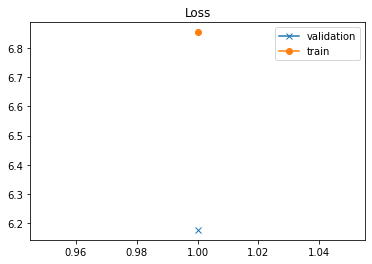

smallest val loss: (1, 6.1771445)
Current Lr:  0.0009838715

Time taken for this epoch: 1278.47 secs

Epoch 2 Batch 0 Loss 6.2366
Epoch 2 Batch 150 Loss 6.2341
Epoch 2 Batch 300 Loss 6.2029
Epoch 2 Batch 450 Loss 6.1768
Epoch 2 Batch 600 Loss 6.1583
Epoch 2 Batch 750 Loss 6.1359
Epoch 2 Batch 900 Loss 6.1179
Epoch 2 Batch 1050 Loss 6.1028
Epoch 2 Batch 1200 Loss 6.0862

novak djokovic beats novak djokovic beats novak djokovic in the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of the final of
the world cup of the world cup is the world cup the world cup the world cup of the world cup the world cup is the world cup in the world cup the world cup in the world cup the world cup in the world cup the world cup the world cup is the world cup in
novak djokovic beats novak djokovic beats novak djokovic in the final of the final of the final of the final

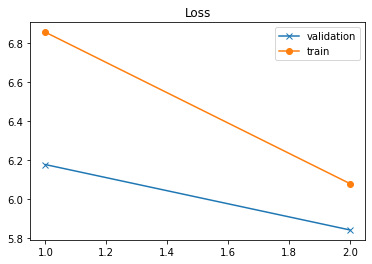

smallest val loss: (2, 5.843004)
Current Lr:  0.0009680031

Time taken for this epoch: 1254.52 secs

Epoch 3 Batch 0 Loss 6.0579
Epoch 3 Batch 150 Loss 5.9153
Epoch 3 Batch 300 Loss 5.9090
Epoch 3 Batch 450 Loss 5.8981
Epoch 3 Batch 600 Loss 5.8871
Epoch 3 Batch 750 Loss 5.8778
Epoch 3 Batch 900 Loss 5.8697
Epoch 3 Batch 1050 Loss 5.8602
Epoch 3 Batch 1200 Loss 5.8523

rafael nadal beats roger federer in the semifinals in the semifinals in the semifinals in the semifinals in the semifinals in the semifinals federer beats roger federer in the semifinals federer beats roger federer in the semifinals in the semifinals
<UNK> <UNK> is the first time to win the world cup the world cup world cup is the world cup world cup world cup in the world cup the world cup the world cup is the world cup cup cup in the world cup
rafael nadal beats roger federer in the semifinals in the semifinals in the semifinals in the semifinals in the semifinals in the semifinals federer beats roger federer in the se

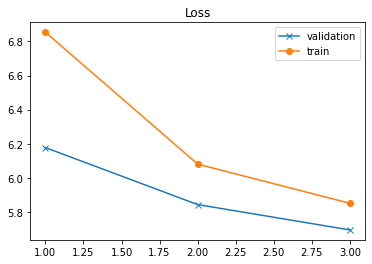

smallest val loss: (3, 5.694254)
Current Lr:  0.0009523907

Time taken for this epoch: 1243.50 secs

Epoch 4 Batch 0 Loss 5.5086
Epoch 4 Batch 150 Loss 5.7599
Epoch 4 Batch 300 Loss 5.7497
Epoch 4 Batch 450 Loss 5.7427
Epoch 4 Batch 600 Loss 5.7399
Epoch 4 Batch 750 Loss 5.7358
Epoch 4 Batch 900 Loss 5.7308
Epoch 4 Batch 1050 Loss 5.7269
Epoch 4 Batch 1200 Loss 5.7217

novak djokovic beats novak djokovic in the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals of the semifinals djokovic beats novak djokovic in the semifinals
<UNK> <UNK> is the first world cup of the world cup of the world cup the world cup the world cup is the first time in the world cup the world cup the world cup the world cup is the first time in the world cup the world cup the world cup
novak djokovic beats novak djokovic in the final of the semifinals of the final of the semifinals of the semi

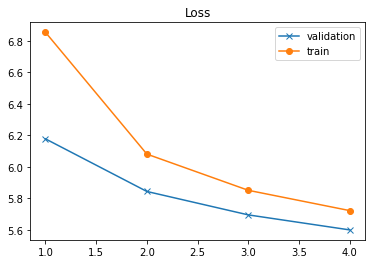

smallest val loss: (4, 5.598876)
Current Lr:  0.00093703007

Time taken for this epoch: 1248.22 secs

Epoch 5 Batch 0 Loss 5.7609
Epoch 5 Batch 150 Loss 5.6541
Epoch 5 Batch 300 Loss 5.6539
Epoch 5 Batch 450 Loss 5.6508
Epoch 5 Batch 600 Loss 5.6489
Epoch 5 Batch 750 Loss 5.6466
Epoch 5 Batch 900 Loss 5.6457
Epoch 5 Batch 1050 Loss 5.6433
Epoch 5 Batch 1200 Loss 5.6422

novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic and novak djokovic in the last eight time
<UNK> <UNK> is the first time to compete in the world cup the world cup the world cup is the first time to compete in the world cup the world cup the world cup the world cup is the first time to compete in the world cup
novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 no

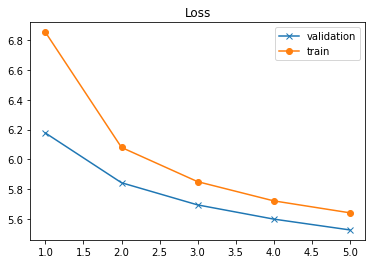

smallest val loss: (5, 5.5262136)
Current Lr:  0.0009219172

Time taken for this epoch: 1244.93 secs

Epoch 6 Batch 0 Loss 5.7057
Epoch 6 Batch 150 Loss 5.5905
Epoch 6 Batch 300 Loss 5.5916
Epoch 6 Batch 450 Loss 5.5941
Epoch 6 Batch 600 Loss 5.5901
Epoch 6 Batch 750 Loss 5.5916
Epoch 6 Batch 900 Loss 5.5887
Epoch 6 Batch 1050 Loss 5.5878
Epoch 6 Batch 1200 Loss 5.5860

rafael nadal beats rafael nadal in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 beats novak djokovic in the world no 1 novak djokovic beats tomas berdych in the world no 1 beats novak djokovic in the world no 1 novak
<UNK> <UNK> is the first time to be a <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
rafael nadal beats novak djokovic in the world no 1 novak djokovic

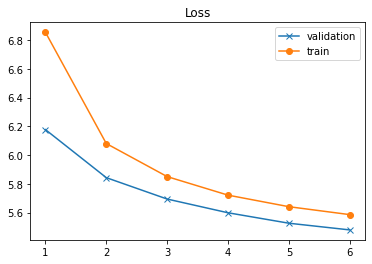

smallest val loss: (6, 5.479711)
Current Lr:  0.00090704806

Time taken for this epoch: 1246.56 secs

Epoch 7 Batch 0 Loss 5.2487
Epoch 7 Batch 150 Loss 5.5482
Epoch 7 Batch 300 Loss 5.5496
Epoch 7 Batch 450 Loss 5.5511
Epoch 7 Batch 600 Loss 5.5476
Epoch 7 Batch 750 Loss 5.5489
Epoch 7 Batch 900 Loss 5.5480
Epoch 7 Batch 1050 Loss 5.5480
Epoch 7 Batch 1200 Loss 5.5474

rafael nadal beats rafael nadal in the world no 1 novak djokovic beats rafael nadal in the world no 1 novak djokovic in the world no 1 novak djokovic beats rafael nadal in the world no 1 novak djokovic in the world no 1 novak djokovic beats novak djokovic in the final
the <UNK> is the first ever world champion of the world champion the <UNK> <UNK> <UNK> is the first ever in the world the world the world the <UNK> is the first ever the first ever the first ever the first ever the first ever the world champion is the first ever in the world the world
rafael nadal beats rafael nadal in the world no 1 novak djokovic beats r

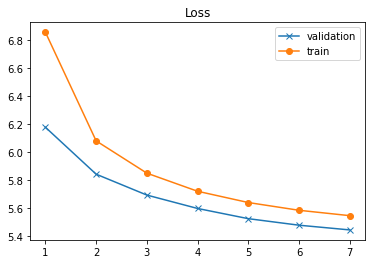

smallest val loss: (7, 5.4461694)
Current Lr:  0.0008924187

Time taken for this epoch: 1248.82 secs

Epoch 8 Batch 0 Loss 5.3331
Epoch 8 Batch 150 Loss 5.5199
Epoch 8 Batch 300 Loss 5.5148
Epoch 8 Batch 450 Loss 5.5148
Epoch 8 Batch 600 Loss 5.5142
Epoch 8 Batch 750 Loss 5.5152
Epoch 8 Batch 900 Loss 5.5148
Epoch 8 Batch 1050 Loss 5.5178
Epoch 8 Batch 1200 Loss 5.5182

novak djokovic beats andy murray in the world no 1 novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 djokovic beats novak djokovic in the world no 1 djokovic in the world no 1 djokovic beats novak djokovic in the quarterfinals
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
novak djokovic beats andy murray in the world no 1 novak djokovic 

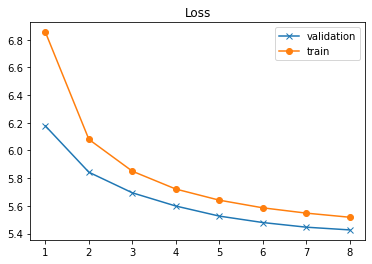

smallest val loss: (8, 5.426452)
Current Lr:  0.0008780253

Time taken for this epoch: 1246.87 secs

Epoch 9 Batch 0 Loss 5.6167
Epoch 9 Batch 150 Loss 5.4839
Epoch 9 Batch 300 Loss 5.4870
Epoch 9 Batch 450 Loss 5.4900
Epoch 9 Batch 600 Loss 5.4905
Epoch 9 Batch 750 Loss 5.4893
Epoch 9 Batch 900 Loss 5.4918
Epoch 9 Batch 1050 Loss 5.4919
Epoch 9 Batch 1200 Loss 5.4926

novak djokovic beats novak djokovic in the atp tour finals in the final of the atp finals djokovic beats novak djokovic in the semifinals of the french open champion champion champion champion champion champion champion champion champion champion champion champion roger federer beats novak djokovic in the semifinals
<UNK> <UNK> is the first ever world champion of the french grand prix the queen elizabeth ii <UNK> is the first time to win the race in the world the world the race is a <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
novak dj

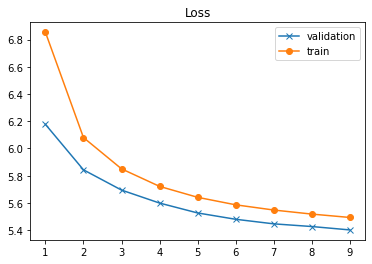

smallest val loss: (9, 5.4015527)
Current Lr:  0.00086386414

Time taken for this epoch: 1245.66 secs

Epoch 10 Batch 0 Loss 5.4949
Epoch 10 Batch 150 Loss 5.4656
Epoch 10 Batch 300 Loss 5.4717
Epoch 10 Batch 450 Loss 5.4724
Epoch 10 Batch 600 Loss 5.4686
Epoch 10 Batch 750 Loss 5.4677
Epoch 10 Batch 900 Loss 5.4691
Epoch 10 Batch 1050 Loss 5.4697
Epoch 10 Batch 1200 Loss 5.4720

novak djokovic beats novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic beats novak djokovic in the world no 1 novak djokovic in the world no 1 novak djokovic beats
french <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <

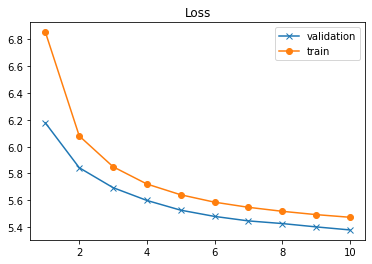

smallest val loss: (10, 5.3788886)
Current Lr:  0.0008499313

Time taken for this epoch: 1247.66 secs

Epoch 11 Batch 0 Loss 5.2237
Epoch 11 Batch 150 Loss 5.4506
Epoch 11 Batch 300 Loss 5.4512
Epoch 11 Batch 450 Loss 5.4516
Epoch 11 Batch 600 Loss 5.4522
Epoch 11 Batch 750 Loss 5.4551
Epoch 11 Batch 900 Loss 5.4542
Epoch 11 Batch 1050 Loss 5.4538
Epoch 11 Batch 1200 Loss 5.4554

rafael nadal beats maria sharapova in the world no 1 novak djokovic in the world no 1 novak djokovic beats the french open in the final of the world no 1 novak djokovic in the last eight time in the world no 1 novak djokovic has won the first time in the world no 1
<UNK> <UNK> is a <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
roger federer be

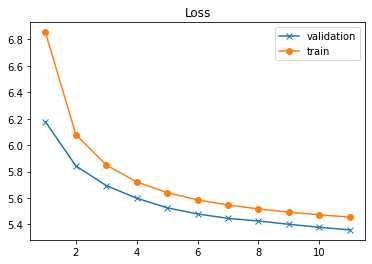

smallest val loss: (11, 5.3589797)
Current Lr:  0.0008362232

Time taken for this epoch: 1244.63 secs

Epoch 12 Batch 0 Loss 5.5310
Epoch 12 Batch 150 Loss 5.4270
Epoch 12 Batch 300 Loss 5.4333
Epoch 12 Batch 450 Loss 5.4372
Epoch 12 Batch 600 Loss 5.4378
Epoch 12 Batch 750 Loss 5.4371
Epoch 12 Batch 900 Loss 5.4383
Epoch 12 Batch 1050 Loss 5.4389
Epoch 12 Batch 1200 Loss 5.4397

rafael nadal beats rafael nadal in the final of the french open final of the french open final rafael nadal beats rafael nadal in the final of the french open final of the french open final of the french open
french grand prix is the first time in the world world cup of the world cup the <UNK> is the first time in the world the world the world history of the world history of the world
rafael nadal beats roger federer in paris masters in paris masters in paris masters federer beats roger federer in final of the final of the french open final federer beats roger federer in the final of the final of the french op

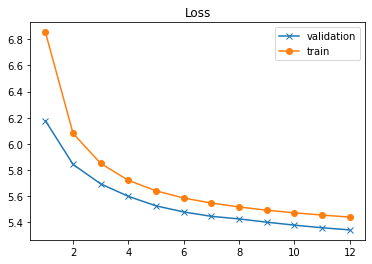

smallest val loss: (12, 5.3423944)
Current Lr:  0.0008227362

Time taken for this epoch: 1239.78 secs

Epoch 13 Batch 0 Loss 5.3689
Epoch 13 Batch 150 Loss 5.4228
Epoch 13 Batch 300 Loss 5.4207
Epoch 13 Batch 450 Loss 5.4201
Epoch 13 Batch 600 Loss 5.4231
Epoch 13 Batch 750 Loss 5.4230
Epoch 13 Batch 900 Loss 5.4230
Epoch 13 Batch 1050 Loss 5.4249
Epoch 13 Batch 1200 Loss 5.4257

rafael nadal beats novak djokovic in paris masters final in paris masters final djokovic beats novak djokovic in paris masters in paris masters final in paris
french <UNK> <UNK> <UNK> wins the world cup in paris <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
rafael nadal beats roger federer in paris masters final in paris masters final final djokovic beats roger federer in paris masters final in paris masters final final final in paris
<UNK> <UNK> is a <UNK> of the <UNK> <UNK> <UNK> <UNK> is a <UNK> of 

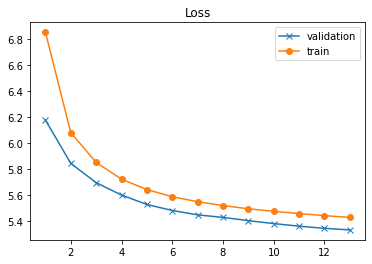

smallest val loss: (13, 5.330086)
Current Lr:  0.00080946664

Time taken for this epoch: 1232.26 secs

Epoch 14 Batch 0 Loss 5.5378
Epoch 14 Batch 150 Loss 5.4022
Epoch 14 Batch 300 Loss 5.4082
Epoch 14 Batch 450 Loss 5.4097
Epoch 14 Batch 600 Loss 5.4116
Epoch 14 Batch 750 Loss 5.4119
Epoch 14 Batch 900 Loss 5.4130
Epoch 14 Batch 1050 Loss 5.4117
Epoch 14 Batch 1200 Loss 5.4132

rafael nadal beats maria sharapova in madrid masters final in madrid masters final in italy maria sharapova beats maria sharapova in italy in italy in italy in italy in italy in italy in italy
france is the first time to be the world world cup in the world the world the <UNK> is a <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
roger federer beats andy murray in paris masters final federer beats andy murray in paris masters final federer beats andy murray in paris masters final federer beats andy murray in par

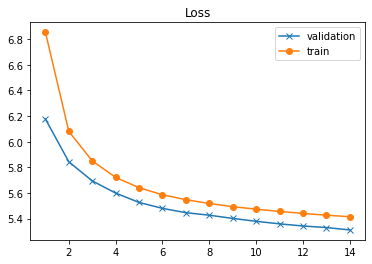

smallest val loss: (14, 5.311733)
Current Lr:  0.0007964111

Time taken for this epoch: 1238.04 secs

Epoch 15 Batch 0 Loss 5.3383
Epoch 15 Batch 150 Loss 5.4082
Epoch 15 Batch 300 Loss 5.4014
Epoch 15 Batch 450 Loss 5.3981
Epoch 15 Batch 600 Loss 5.3998
Epoch 15 Batch 750 Loss 5.4023
Epoch 15 Batch 900 Loss 5.4037
Epoch 15 Batch 1050 Loss 5.4029
Epoch 15 Batch 1200 Loss 5.4029

rafael nadal beats rafael nadal in madrid in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy in italy
french grand prix de france wins the world cup in the world cup the <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
rafael nadal beats andy murray in french open final in french open final djokovic beats andy murray in french open final final djokovic beats andy murray in french op

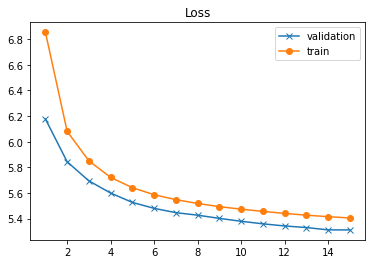

smallest val loss: (15, 5.311483)
Current Lr:  0.0007835662

Time taken for this epoch: 1237.97 secs

Epoch 16 Batch 0 Loss 5.3595
Epoch 16 Batch 150 Loss 5.3747
Epoch 16 Batch 300 Loss 5.3837
Epoch 16 Batch 450 Loss 5.3877
Epoch 16 Batch 600 Loss 5.3916
Epoch 16 Batch 750 Loss 5.3883
Epoch 16 Batch 900 Loss 5.3894
Epoch 16 Batch 1050 Loss 5.3896
Epoch 16 Batch 1200 Loss 5.3939

rafael nadal wins the french open title in madrid in madrid in madrid in madrid in italy open final of the french open in madrid in madrid in the french open final of the french open in the french open in the french open in the french open
the french grand prix is the first time to win the world cup in the world the world the <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
roger federer wins the french open title in the french open final in the french open final the french open final in the french open final in the french 

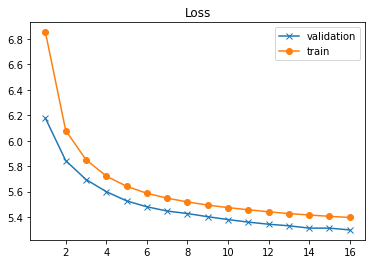

smallest val loss: (16, 5.2975926)
Current Lr:  0.00077092845

Time taken for this epoch: 1243.55 secs

Epoch 17 Batch 0 Loss 5.2789
Epoch 17 Batch 150 Loss 5.3642
Epoch 17 Batch 300 Loss 5.3788
Epoch 17 Batch 450 Loss 5.3779
Epoch 17 Batch 600 Loss 5.3787
Epoch 17 Batch 750 Loss 5.3813
Epoch 17 Batch 900 Loss 5.3830


In [ ]:
print(params)
print('#'*40)

for epoch in range(ep,EPOCHS+1):
    ep = epoch
    start = time.time()

    train_loss.reset_states()
  
    for (batch, (inp, tar)) in enumerate(dataset):
        
        train_step(inp, tar)
    
        if batch % 150 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(epoch , batch, train_loss.result()))
                  
    print()
    print(summarize(longreview_val[i1]))
    print(summarize(longreview_val[i2]))
    print(summarize(longreview_val[i3]))
    print(summarize(longreview_val[i4]))
    print()
    
    val_loss_ = validate().numpy()
    history['val'].append((epoch,val_loss_))
    print ('\n* Train Loss {:.4f}'.format(train_loss.result()))
    history['train'].append((epoch,train_loss.result().numpy()))
    
    
    if best_val_loss-val_loss_ > 0.1:
        ckpt_save_path4 = ckpt_manager4.save()
        print ('\nSaving checkpoint for epoch {} at {}'.format(epoch, ckpt_save_path4))  
        best_val_loss = val_loss_
    
    hist(history)
    print('Current Lr: ',optimizer2._decayed_lr('float32').numpy())
    print ('\nTime taken for this epoch: {:.2f} secs\n'.format(time.time() - start))
    print('='*40)

In [ ]:
print("TEXT:",longreview_val[i1])
print()
print("Actual:",summaries_val[i1])
print()
print("predicted:",summarize(longreview_val[i1]))

TEXT: traces narcotics hypodermic needles found bodies two american security officers container ship maersk alabama suggested deaths resulted drug overdoses, seychelles government official told cnn. seychelles police identified bodies found tuesday jeffrey reynolds mark kennedy, 44. worked trident group, virginia based maritime security services firm. trident group president tom rothrauff said former navy seals. bizarre. course, shock. great guys, rothrauff said. absolutely clueless happened. police said autopsy would carried early next week. seychelles government official, spoke condition identified, said thursday presence drug traces paraphernalia would suggest deaths result drug overdose. seychelles police statement said despite media accounts traces drugs, authorities released reports suggesting deaths result overdose. statement, however, deny drugs found suggest alternative cause death. 500 foot maersk alabama target attempted hijacking pirate infested waters east africa 2009 inci

In [ ]:
print("TEXT:",longreview_val[12])
print()
print("Actual:",summaries_val[12])
print()
print("predicted:",summarize(longreview_val[12]))

TEXT: hamilton, bermuda four chinese nationals uyghur ethnicity held u.s. military guantanamo bay, cuba, detention facility resettled bermuda, officials said thursday. attorney general eric holder says u.s. extremely grateful government bermuda. all, humanitarian act, bermudan premier ewart brown told cnn interview cabinet office hamilton, bermuda. see quid pro quo. four twice cleared release bush administration year, according justice department statement. among 17 uyghur detainees facility set hold terror suspects. four flown private plane wednesday night cuba bermuda accompanied u.s. bermudan representatives well attorneys, according susan baker manning, part men legal team. president obama pledged close guantanamo facility, raising questions happen 200 remaining detainees. political backlash bringing detainees united states increased focus sending countries. brown said read article issue guantanamo bay detainees' fates washington post washington white house meeting may. said decide

In [ ]:
print("TEXT:",longreview_val[30])
print()
print("Actual:",summaries_val[30])
print()
print("predicted:",summarize(longreview_val[30]))

TEXT: big winners formula one season could road drivers rather f1 racers, according one former world champion. jody scheckter, took drivers' title 1979, hopes raft technological changes notably smaller, hybrid engines promise greater fuel efficiency help improve road cars' performance. positive sport, first time seen sport bring regulations really push envelope technology every type car, south african told cnn. trying take efficiency everywhere car. year race cars boast enhanced energy recovery system 1.6 liter v6 engines, compared 2.4 liter v8s show last year. ers uses heat generated braking thermal energy exhaust gases create extra power. kinetic energy recovery system used f1 since 2009, scheckter says latest advancements sport benefit everyday drivers. wherever heat, turn energy, added former ferrari driver. point view, road cars becoming more. they've taken energy brakes different areas, formula one done much higher degree ever seen before. think technology flow road cars quickly.

Testing

In [ ]:
from sumeval.metrics.rouge import RougeCalculator
test_texts=data1['cleaned_document']
test_summaries=data1['cleaned_summary']
print(len(test_summaries),len(test_texts))
r1=[]
r2=[]
rl=[]
rbe=[]
for i in range(len(test_texts)):
    model_summary=summarize(test_texts[i])
    rouge = RougeCalculator(stopwords=True, lang="en")
    rouge_1 = rouge.rouge_n(
            summary=model_summary,
            references=test_summaries[i],
            n=1)
    rouge_2 = rouge.rouge_n(
            summary=model_summary,
            references=[test_summaries[i]],
            n=2)
    rouge_l = rouge.rouge_l(
            summary=model_summary,
            references=[test_summaries[i]])
    rouge_be = rouge.rouge_be(
            summary=model_summary,
            references=[test_summaries[i]])
    r1.append(rouge_1)
    r2.append(rouge_2)
    rl.append(rouge_l)
    rbe.append(rouge_be)
    #print("ROUGE-1: {}, ROUGE-2: {}, ROUGE-L: {}, ROUGE-BE: {}".format(rouge_1, rouge_2, rouge_l, rouge_be).replace(", ", "\n"))
print("stop")


In [ ]:
pip install sumeval

     |████████████████████████████████| 80 kB 3.8 MB/s 
     |████████████████████████████████| 90 kB 9.2 MB/s 
  Created wheel for sumeval: filename=sumeval-0.2.2-py3-none-any.whl size=54549 sha256=05da7ccaded8f7f2c43cadf26059f34469de1f3a6f40d2e166d4cbfd33c3f44a
  Stored in directory: /root/.cache/pip/wheels/f4/3f/31/c521bdfba2be7518bd94ba3e8b982812822167cc0497fad192
Successfully built sumeval


In [ ]:
rouge_1=sum(r1)/len(r1)
rouge_2=sum(r2)/len(r2)
rouge_l=sum(rl)/len(rl)
rouge_be=sum(rbe)/len(rbe)
print("ROUGE-1: {}, ROUGE-2: {}, ROUGE-L: {}, ROUGE-BE: {}".format(rouge_1, rouge_2, rouge_l, rouge_be).replace(", ", "\n"))

ROUGE-1: 0.06318816533191597
ROUGE-2: 0.007669062383992912
ROUGE-L: 0.05824863315770361
ROUGE-BE: 0.007601398693860037


In [ ]:
#Recall-Oriented Understudy for Gisting Evaluation

1089
